In [1]:
clc;clear;close all;
addpath('function','data');
load('import_phy.mat')

In [2]:
[u_avg, v_avg, w_avg] = calculateMeanVelocity(Up, Vp, Wp);
[u_turb, v_turb, w_turb] = calculateTurbulentFluctuations(Up, Vp, Wp, u_avg, v_avg, w_avg);
[rey_uu, rey_uv, rey_uw, rey_vv, rey_vw, rey_ww] = calculateReynoldsStress(u_turb, v_turb, w_turb);

In [3]:
Um = 1;
delta = 1;

In [4]:
du_um = (u_avg(end) - u_avg(end-1)) / Um;
dy_delta = (Y(end) - Y(end-1)) / delta;
u_tao = Um * sqrt(abs(1 / Rem * du_um / dy_delta));
delta_v = delta * 1 / (Rem * (u_tao / Um));
Re_tao = delta / delta_v;

In [5]:
fprintf('u_tao = %f', u_tao);
fprintf('  delta_v = %f', delta_v);
fprintf('  Re_tao = %f', Re_tao);

u_tao = 0.062339  delta_v = 0.005729  Re_tao = 174.547940

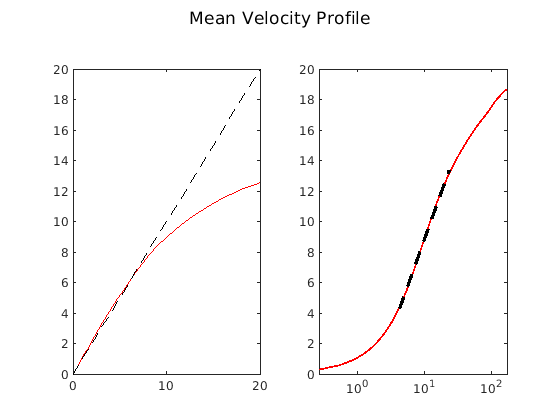

In [6]:
y_plus = Y / delta_v;
y_plus_max = max(y_plus);
y_plus = y_plus - y_plus(1);
u_plus = u_avg / u_tao; 

x= y_plus(1:64);
x = log10(x);

figure(1)
    set(gcf,'position',[250 300 1600 200])
    
    subplot(1,2,1)
        %set(gca,'position', [0.125 0.45 0.32 0.45]);
        plot(y_plus, u_plus,'LineWidth', 1.3,'color','r')
        hold on
        plot(y_plus,y_plus,'--','color','k')
        hold on
        xlim([0 20])

    subplot(1,2,2)
        %set(gca,'position', [0.56 0.45 0.32 0.45]);
        plot(x, u_plus(1:64),'LineWidth', 1.3,'color','r')
        hold on
        % Linear fit
        p = polyfit(x(12:30), u_plus(12:30), 1);
        y_fit = polyval(p, x(12:30));
        plot(x(12:30), y_fit, '--','color','k','LineWidth',2.5)
        %set(gca,'XScale','log')
        xticks([0 1 2])
        xticklabels({'10^0','10^1','10^2', 'Interpreter', 'latex'})

    sgtitle('Mean Velocity Profile','HorizontalAlignment', 'center');
print(gcf, './photo/part2/Mean Velocity Profile_Wall.png', '-dpng', '-r300');

In [7]:
rey_uu_new = rey_uu / (u_tao * u_tao);
rey_uv_new = rey_uv / (u_tao * u_tao);
rey_uw_new = rey_uw / (u_tao * u_tao);
rey_vv_new = rey_vv / (u_tao * u_tao);
rey_vw_new = rey_vw / (u_tao * u_tao);
rey_ww_new = rey_ww / (u_tao * u_tao);

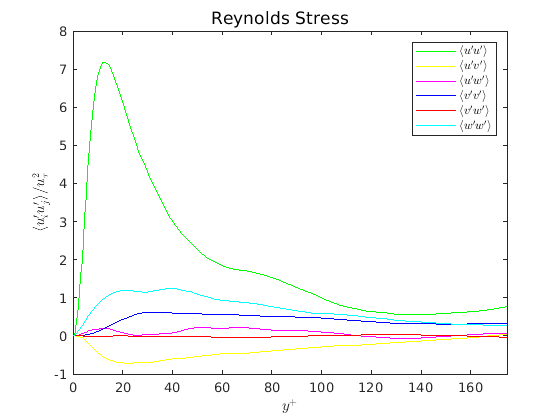

In [8]:
figure(2);
    plot(y_plus, rey_uu_new, 'g', y_plus, rey_uv_new, 'y', y_plus, rey_uw_new, 'm', y_plus, rey_vv_new, 'b', y_plus, rey_vw_new, 'r', y_plus, rey_ww_new, 'c', 'LineWidth', 1.4);
    legend('$\langle{u''u''}\rangle$', '$\langle{u''v''}\rangle$', '$\langle{u''w''}\rangle$', '$\langle{v''v''}\rangle$', '$\langle{v''w''}\rangle$', '$\langle{w''w''}\rangle$', 'Interpreter', 'latex')
    xlabel('$y^+$', 'Interpreter', 'latex')
    ylabel('$\langle{u_i''u_j''}\rangle /u^2_\tau$', 'Interpreter', 'latex')
    xlim([0 y_plus_max])
    sgtitle('Reynolds Stress','HorizontalAlignment', 'center');
print(gcf, './photo/part2/Reynolds Stress_Wall.png', '-dpng', '-r300');

In [9]:
y0 = 114;

u_origin = u_turb(:,y0,:);
u_origin = reshape(u_origin,[NX,NZ]);
u_turb_tensors_streamwise = zeros(NX, NZ);
v_origin = v_turb(:,y0,:);
v_origin = reshape(v_origin,[NX,NZ]);
v_turb_tensors_streamwise = zeros(NX, NZ);
w_origin = w_turb(:,y0,:);
w_origin = reshape(w_origin,[NX,NZ]);
w_turb_tensors_streamwise = zeros(NX, NZ);
R = zeros(NX,1);
r = zeros(NX,1);

In [10]:
for phase = 0:(NX -1)
    u_turb_tensors_streamwise(1:NX-phase,:) = u_origin(phase+1:NX,:);
    u_turb_tensors_streamwise(NX-phase+1:NX,:) = u_origin(1:phase,:);
    v_turb_tensors_streamwise(1:NX-phase,:) = v_origin(phase+1:NX,:);
    v_turb_tensors_streamwise(NX-phase+1:NX,:) = v_origin(1:phase,:);
    w_turb_tensors_streamwise(1:NX-phase,:) = w_origin(phase+1:NX,:);
    w_turb_tensors_streamwise(NX-phase+1:NX,:) = w_origin(1:phase,:);
    
    Ruu_streamwise(phase+1) = mean(mean(u_origin .* u_turb_tensors_streamwise));
    ruu_streamwise(phase+1) = Ruu_streamwise(phase+1) / rey_uu(y0);
    Rvv_streamwise(phase+1) = mean(mean(v_origin .* v_turb_tensors_streamwise));
    rvv_streamwise(phase+1) = Rvv_streamwise(phase+1) / rey_vv(y0);
    Rww_streamwise(phase+1) = mean(mean(w_origin .* w_turb_tensors_streamwise));
    rww_streamwise(phase+1) = Rww_streamwise(phase+1) / rey_ww(y0);
end

In [11]:
for phase = 0:(NZ -1)
    u_turb_tensors_spanwise(:,1:NZ-phase) = u_origin(:,phase+1:NZ);
    u_turb_tensors_spanwise(:,NZ-phase+1:NZ) = u_origin(:,1:phase);
    v_turb_tensors_spanwise(:,1:NZ-phase) = v_origin(:,phase+1:NZ);
    v_turb_tensors_spanwise(:,NZ-phase+1:NZ) = v_origin(:,1:phase);
    w_turb_tensors_spanwise(:,1:NZ-phase) = w_origin(:,phase+1:NZ);
    w_turb_tensors_spanwise(:,NZ-phase+1:NZ) = w_origin(:,1:phase);

    
    Ruu(phase+1) = mean(mean(u_origin .* u_turb_tensors_spanwise));
    ruu(phase+1) = Ruu(phase+1) / rey_uu(y0);
    Rvv(phase+1) = mean(mean(v_origin .* v_turb_tensors_spanwise));
    rvv(phase+1) = Rvv(phase+1) / rey_vv(y0);
    Rww(phase+1) = mean(mean(w_origin .* w_turb_tensors_spanwise));
    rww(phase+1) = Rww(phase+1) / rey_ww(y0);
end

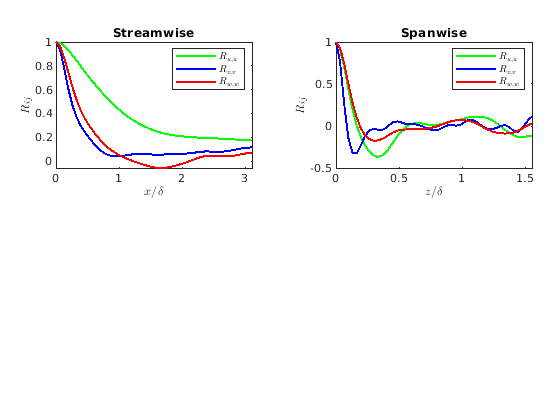

In [12]:
figure(3)
    set(gcf,'position',[250 300 1600 700])

    subplot(1,2,1)
        set(gca,'position', [0.1 0.6 0.35 0.3]);
        x_delta = X / delta;
        plot(x_delta, ruu_streamwise, 'g', x_delta, rvv_streamwise, 'b', x_delta, rww_streamwise, 'r', 'LineWidth', 1.5);
        xlim([0 max(x_delta)/2])
        legend('$R_{u,u}$', '$R_{v,v}$', '$R_{w,w}$', 'Interpreter', 'latex')
        xlabel('$x/\delta$', 'Interpreter', 'latex')
        ylabel('$R_{ij} $', 'Interpreter', 'latex')
        title('Streamwise','HorizontalAlignment', 'center');

    subplot(1,2,2)
        set(gca,'position', [0.6 0.6 0.35 0.3]);
        z_delta = Z / delta;
        plot(z_delta, ruu, 'g', z_delta, rvv, 'b', z_delta, rww, 'r', 'LineWidth', 1.5);
        xlim([0 max(z_delta)/2])
        legend('$R_{u,u}$', '$R_{v,v}$', '$R_{w,w}$', 'Interpreter', 'latex')
        xlabel('$z/\delta$', 'Interpreter', 'latex')
        ylabel('$R_{ij} $', 'Interpreter', 'latex')
        title('Spanwise','HorizontalAlignment', 'center');

print(gcf, './photo/part2/Point Autocorrelation Coefficient.png', '-dpng', '-r300');